In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [3]:
dataset = pd.read_csv('1851 news_articles.csv')

In [4]:
dataset.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [5]:
len(dataset.index)

2096

In [6]:
dataset.isnull()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2091,False,False,False,True,False,False,False,False,False,False,True,False
2092,False,False,False,True,False,False,False,False,False,False,True,False
2093,False,False,False,True,False,False,False,False,False,False,True,False
2094,False,False,False,True,False,False,False,False,False,False,True,False


In [7]:
dataset.isnull().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

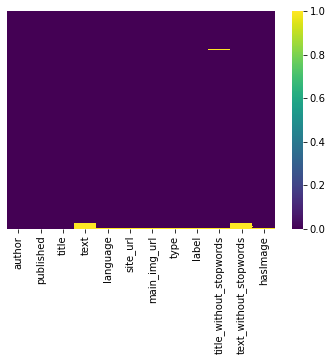

In [8]:
sns.heatmap(dataset.isnull() , yticklabels=False , cmap="viridis")

In [9]:
dataset.dropna(inplace=True)

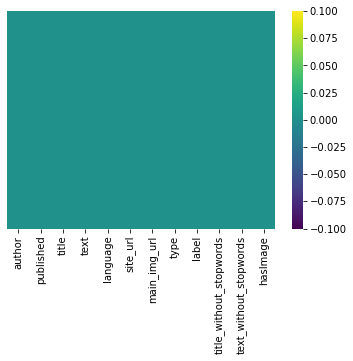

In [10]:
sns.heatmap(dataset.isnull() , yticklabels=False , cmap="viridis")

In [11]:
dataset.isnull().sum()

author                     0
published                  0
title                      0
text                       0
language                   0
site_url                   0
main_img_url               0
type                       0
label                      0
title_without_stopwords    0
text_without_stopwords     0
hasImage                   0
dtype: int64

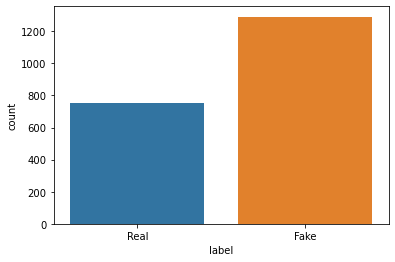

In [12]:
sns.countplot(x = "label" , data = dataset)

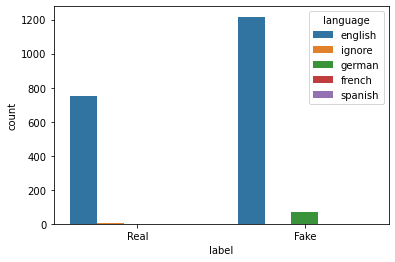

In [13]:
sns.countplot(x = "label" , hue="language" , data = dataset)

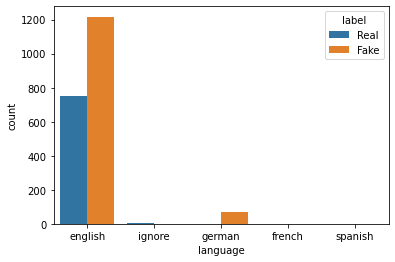

In [14]:
sns.countplot(x = "language" , hue="label" , data = dataset)

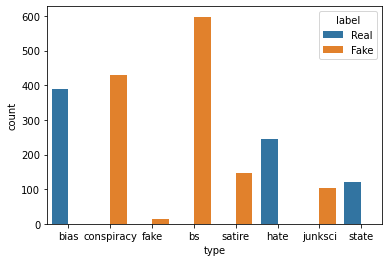

In [15]:
sns.countplot(x = "type" , hue="label" , data = dataset)


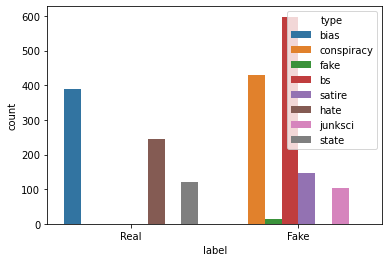

In [16]:
sns.countplot(x="label" , hue = "type" ,  data = dataset)

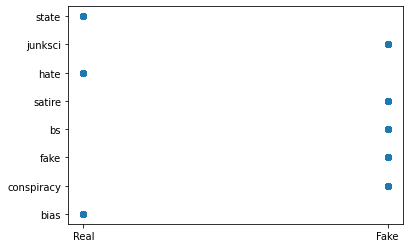

In [17]:
plt.scatter(dataset['label'] , dataset['type'])

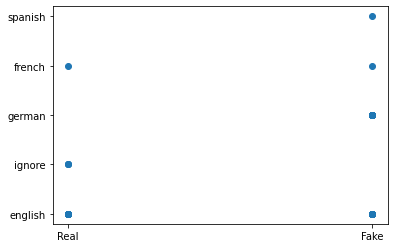

In [18]:
plt.scatter(dataset['label'] , dataset['language'])

In [19]:
lang = pd.get_dummies(dataset['language'])
lang

,english,french,german,ignore,spanish
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
2041,1,0,0,0,0
2042,1,0,0,0,0
2043,1,0,0,0,0
2044,1,0,0,0,0


In [20]:
lang = pd.get_dummies(dataset['language'] , drop_first=True)
lang

,french,german,ignore,spanish
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
2041,0,0,0,0
2042,0,0,0,0
2043,0,0,0,0
2044,0,0,0,0


In [21]:
dataset['site_url'].value_counts()

presstv.ir             100
politicususa.com       100
clickhole.com          100
awdnews.com            100
infowars.com           100
                      ... 
therussophile.org        1
intrepidreport.com       1
projectveritas.com       1
redstatewatcher.com      1
theunrealtimes.com       1
Name: site_url, Length: 68, dtype: int64

In [22]:
dataset['author'].value_counts()

No Author                              505
Activist Post                           82
EdJenner                                73
noreply@blogger.com (Der Postillon)     72
Anonymous                               58
                                      ... 
Tony Rabon                               1
Jonathan Brooks                          1
TrueBrit                                 1
Lisa Beach                               1
Ivan Jose                                1
Name: author, Length: 485, dtype: int64

In [23]:
article_type = pd.get_dummies(dataset['type'])
article_type

,bias,bs,conspiracy,fake,hate,junksci,satire,state
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2041,1,0,0,0,0,0,0,0
2042,1,0,0,0,0,0,0,0
2043,1,0,0,0,0,0,0,0
2044,1,0,0,0,0,0,0,0


In [24]:
article_type = pd.get_dummies(dataset['type'] , drop_first=True)
article_type

,bs,conspiracy,fake,hate,junksci,satire,state
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2041,0,0,0,0,0,0,0
2042,0,0,0,0,0,0,0
2043,0,0,0,0,0,0,0
2044,0,0,0,0,0,0,0


In [25]:
dataset = pd.concat([dataset , lang , article_type] , axis=1)
dataset.head(5)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,...,german,ignore,spanish,bs,conspiracy,fake,hate,junksci,satire,state
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,...,0,0,0,0,0,0,0,0,0,0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,...,0,0,0,0,0,0,0,0,0,0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,...,0,0,0,0,0,0,0,0,0,0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,...,0,0,0,0,0,0,0,0,0,0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,...,0,0,0,0,0,0,0,0,0,0


In [26]:
dataset.head(5)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,...,german,ignore,spanish,bs,conspiracy,fake,hate,junksci,satire,state
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,...,0,0,0,0,0,0,0,0,0,0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,...,0,0,0,0,0,0,0,0,0,0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,...,0,0,0,0,0,0,0,0,0,0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,...,0,0,0,0,0,0,0,0,0,0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,...,0,0,0,0,0,0,0,0,0,0


In [27]:
outcome = pd.get_dummies(dataset['label'] , drop_first=True)
outcome

,Real
0,1
1,1
2,1
3,1
4,1
...,...
2041,1
2042,1
2043,1
2044,1


In [28]:
dataset = pd.concat([dataset , outcome] , axis=1)
dataset.head(5)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,...,ignore,spanish,bs,conspiracy,fake,hate,junksci,satire,state,Real
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,...,0,0,0,0,0,0,0,0,0,1
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,...,0,0,0,0,0,0,0,0,0,1
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,...,0,0,0,0,0,0,0,0,0,1
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,...,0,0,0,0,0,0,0,0,0,1
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,...,0,0,0,0,0,0,0,0,0,1


In [29]:
dataset.drop(['author' , 'published' , 'title' , 'text' ,  'main_img_url' , 'language' , 'site_url' , 'title_without_stopwords' , 'text_without_stopwords' , 'type' , 'label'],axis=1,inplace=True)

In [30]:
dataset.head()

,hasImage,french,german,ignore,spanish,bs,conspiracy,fake,hate,junksci,satire,state,Real
0,1.0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.0,0,0,0,0,0,0,0,0,0,0,0,1


In [31]:
dataset.drop(['hasImage'] , axis=1 , inplace=True)

In [32]:
dataset.head()

,french,german,ignore,spanish,bs,conspiracy,fake,hate,junksci,satire,state,Real
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1


In [33]:
x = dataset.drop(['Real'] , axis=1)

In [34]:
y = dataset['Real']

In [35]:
x

,french,german,ignore,spanish,bs,conspiracy,fake,hate,junksci,satire,state
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2041,0,0,0,0,0,0,0,0,0,0,0
2042,0,0,0,0,0,0,0,0,0,0,0
2043,0,0,0,0,0,0,0,0,0,0,0
2044,0,0,0,0,0,0,0,0,0,0,0


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [37]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2041    1
2042    1
2043    1
2044    1
2045    1
Name: Real, Length: 2045, dtype: uint8

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [83]:
#logistic regression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

1.0

In [39]:
#svm
svm = SVC(gamma='auto')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

1.0

In [85]:
#random forest
#not necessary
rf = RandomForestClassifier(n_estimators=40)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

1.0

In [41]:
from sklearn.linear_model import LogisticRegression
logmod=LogisticRegression()
logmod.fit(x_train,y_train)

LogisticRegression()

In [42]:
predictions=logmod.predict(x_test)

In [43]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       258\n           1       1.00      1.00      1.00       151\n\n    accuracy                           1.00       409\n   macro avg       1.00      1.00      1.00       409\nweighted avg       1.00      1.00      1.00       409\n'

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[258,   0],
       [  0, 151]])

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

100.0

In [46]:
from sklearn.svm import SVC
svm1 = SVC(gamma='auto')
svm1.fit(x_train, y_train)
svm1.score(x_test, y_test)*100

100.0